In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# Define the tickers for technology and financial stocks on Hang Seng
tickers = ['0700.HK', '0939.HK', '2628.HK', '2888.HK', '0005.HK', '3988.HK', '0932.HK', '1398.HK']

# Define the start and end dates for data collection
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Mean daily returns
mean_daily_returns = returns.mean()

# Covariance of daily returns
cov_matrix = returns.cov()

# Define the number of portfolios to generate
num_portfolios = 10000

# Set up arrays to hold results
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    # Calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

    # Store results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    # Store Sharpe Ratio (return / volatility)
    results[2,i] = results[0,i] / results[1,i]

# Convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])

# Locate the position of the portfolio with highest Sharpe Ratio
max_sharpe_portfolio = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]

# Print the details of the portfolio with highest Sharpe Ratio
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

# Locate the position of the portfolio with minimum volatility
min_volatility_portfolio = results_frame.iloc[results_frame['Volatility'].idxmin()]

# Print the details of the portfolio with minimum volatility
print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)


[*********************100%%**********************]  8 of 8 completed


Portfolio with Maximum Sharpe Ratio:
Return          0.070859
Volatility      0.204521
Sharpe Ratio    0.346462
Name: 8502, dtype: float64

Portfolio with Minimum Volatility:
Return          0.048537
Volatility      0.180222
Sharpe Ratio    0.269320
Name: 5131, dtype: float64


In [2]:
# Extract the weights of the selected portfolios
max_sharpe_weights = results_frame.iloc[results_frame['Sharpe Ratio'].idxmax()]
min_volatility_weights = results_frame.iloc[results_frame['Volatility'].idxmin()]

# Get the tickers of the stocks
selected_tickers_max_sharpe = [tickers[i] for i, weight in enumerate(max_sharpe_weights) if weight != 0]
selected_tickers_min_volatility = [tickers[i] for i, weight in enumerate(min_volatility_weights) if weight != 0]

# Print out the tickers of the selected stocks
print("Stocks picked for the portfolio with Maximum Sharpe Ratio:")
print(selected_tickers_max_sharpe)

print("\nStocks picked for the portfolio with Minimum Volatility:")
print(selected_tickers_min_volatility)



Stocks picked for the portfolio with Maximum Sharpe Ratio:
['0700.HK', '0939.HK', '2628.HK']

Stocks picked for the portfolio with Minimum Volatility:
['0700.HK', '0939.HK', '2628.HK']


In [3]:
import pandas as pd
import yfinance as yf

# Define the tickers for the stocks
tickers = ['0700.HK', '0939.HK', '2628.HK']

# Define the start and end dates for data collection
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Save the data to a CSV file
data.to_csv('stock_data.csv')

print("Data downloaded and saved to 'stock_data.csv' file.")


[*********************100%%**********************]  3 of 3 completed

Data downloaded and saved to 'stock_data.csv' file.


In [4]:
import pandas as pd
import yfinance as yf

# Define the tickers for the stocks
tickers = ['0700.HK', '0939.HK', '2628.HK']

# Define the start and end dates for data collection
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Save the data to a CSV file
data.to_csv('stock_data.csv')

print("Data saved to 'stock_data.csv'. Please download the file manually.")


[*********************100%%**********************]  3 of 3 completed

Data saved to 'stock_data.csv'. Please download the file manually.


In [11]:
import pandas as pd
import yfinance as yf

# Define the tickers for the stocks
tickers = ['0700.HK', '0939.HK', '2628.HK']

# Define the start and end dates for data collection
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)

# Extract open and close prices
open_prices = data['Open']
close_prices = data['Close']

# Combine open and close prices into a DataFrame
prices_table = pd.concat([open_prices, close_prices], axis=1)

# Print the table
print(prices_table)


[*********************100%%**********************]  3 of 3 completed

Ticker         0700.HK  0939.HK    2628.HK     0700.HK  0939.HK    2628.HK
Date                                                                      
2019-01-02  290.384796     6.43  16.340000  282.641174     6.27  16.200001
2019-01-03  280.244354     6.25  16.200001  281.166229     6.29  16.020000
2019-01-04  276.925690     6.24  15.960000  286.328613     6.41  16.400000
2019-01-07  293.150360     6.47  16.600000  292.781616     6.42  16.660000
2019-01-08  293.150360     6.42  16.559999  290.937897     6.42  16.580000
...                ...      ...        ...         ...      ...        ...
2023-12-21  309.200012     4.44   9.510000  312.600006     4.51   9.700000
2023-12-22  317.000000     4.53   9.790000  274.000000     4.51   9.670000
2023-12-27  282.200012     4.53   9.770000  285.000000     4.56   9.770000
2023-12-28  285.000000     4.59   9.840000  293.000000     4.63  10.220000
2023-12-29  295.000000     4.62  10.260000  293.600006     4.65  10.120000

[1230 rows x 6 columns]


In [22]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define Hang Seng tickers
hang_seng_tickers = ['0700.HK', '0939.HK', '2628.HK']  # Example tickers

# Define start and end dates
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
price_data = yf.download(hang_seng_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate Log Returns
log_returns = np.log(1 + price_data.pct_change())

# Generate Random Weights
number_of_symbols = len(hang_seng_tickers)
random_weights = np.random.random(number_of_symbols)

# Generate Rebalance Weights (normalize weights to sum up to 1)
rebalance_weights = random_weights / np.sum(random_weights)

# Calculate Expected Returns (annualized)
exp_ret = np.sum((log_returns.mean() * rebalance_weights) * 252)

# Calculate Expected Volatility (annualized)
exp_vol = np.sqrt(
    np.dot(
        rebalance_weights.T,
        np.dot(log_returns.cov() * 252, rebalance_weights)
    )
)

# Calculate Sharpe Ratio
sharpe_ratio = exp_ret / exp_vol

# Create DataFrame to display weights
weights_df = pd.DataFrame(data={
    'Random Weights': random_weights,
    'Rebalance Weights': rebalance_weights
})

# Create DataFrame to display metrics
metrics_df = pd.DataFrame(data={
    'Expected Portfolio Returns': exp_ret,
    'Expected Portfolio Volatility': exp_vol,
    'Portfolio Sharpe Ratio': sharpe_ratio
}, index=[0])

# Print weights and metrics
print('')
print('='*80)
print('PORTFOLIO WEIGHTS:')
print('-'*80)
print(weights_df)
print('-'*80)

print('')
print('='*80)
print('PORTFOLIO METRICS:')
print('-'*80)
print(metrics_df)
print('-'*80)



[*********************100%%**********************]  3 of 3 completed


PORTFOLIO WEIGHTS:
--------------------------------------------------------------------------------
   Random Weights  Rebalance Weights
0        0.142579           0.148609
1        0.613441           0.639385
2        0.203404           0.212007
--------------------------------------------------------------------------------

PORTFOLIO METRICS:
--------------------------------------------------------------------------------
   Expected Portfolio Returns  Expected Portfolio Volatility  \
0                   -0.004231                       0.214777   

   Portfolio Sharpe Ratio  
0                 -0.0197  
--------------------------------------------------------------------------------


In [23]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define Hang Seng tickers
hang_seng_tickers = ['0700.HK', '0939.HK', '2628.HK']  # Example tickers

# Define start and end dates
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
price_data = yf.download(hang_seng_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate Log Returns
log_returns = np.log(1 + price_data.pct_change())

# Initialize components for Monte Carlo Simulation
num_of_portfolios = 5000
number_of_symbols = len(hang_seng_tickers)

all_weights = np.zeros((num_of_portfolios, number_of_symbols))
ret_arr = np.zeros(num_of_portfolios)
vol_arr = np.zeros(num_of_portfolios)
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulations
for ind in range(num_of_portfolios):
    # Calculate random weights
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights

    # Calculate expected log returns
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)

    # Calculate volatility
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
    )

    # Calculate Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

# Create a DataFrame for simulation results
simulations_data = {
    'Returns': ret_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr,
    'Portfolio Weights': [w.tolist() for w in all_weights]
}
simulations_df = pd.DataFrame(simulations_data)

# Print out the results
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)


[*********************100%%**********************]  3 of 3 completed



SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0 -0.008470    0.254841     -0.033235   
1 -0.021654    0.248283     -0.087215   
2 -0.011668    0.237507     -0.049125   
3 -0.007586    0.224520     -0.033787   
4 -0.011253    0.269338     -0.041780   

                                   Portfolio Weights  
0  [0.380980688015697, 0.3295193714581435, 0.2894...  
1  [0.16533073640187823, 0.3506506856580719, 0.48...  
2  [0.24525448203808106, 0.4222005448669583, 0.33...  
3  [0.20011803211354576, 0.5331051788013976, 0.26...  
4  [0.42337659775035885, 0.24170251146139815, 0.3...  
--------------------------------------------------------------------------------


In [24]:
import pandas as pd
import numpy as np
import yfinance as yf

# Define Hang Seng tickers
hang_seng_tickers = ['0700.HK', '0939.HK', '2628.HK']  # Example tickers

# Define start and end dates
start_date = '2019-01-01'
end_date = '2023-12-31'

# Download data from Yahoo Finance
price_data = yf.download(hang_seng_tickers, start=start_date, end=end_date)['Adj Close']

# Calculate Log Returns
log_returns = np.log(1 + price_data.pct_change())

# Initialize components for Monte Carlo Simulation
num_of_portfolios = 5000
number_of_symbols = len(hang_seng_tickers)

all_weights = np.zeros((num_of_portfolios, number_of_symbols))
ret_arr = np.zeros(num_of_portfolios)
vol_arr = np.zeros(num_of_portfolios)
sharpe_arr = np.zeros(num_of_portfolios)

# Start the simulations
for ind in range(num_of_portfolios):
    # Calculate random weights
    weights = np.array(np.random.random(number_of_symbols))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights

    # Calculate expected log returns
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 252)

    # Calculate volatility
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
    )

    # Calculate Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

# Create a DataFrame for simulation results
simulations_data = {
    'Returns': ret_arr,
    'Volatility': vol_arr,
    'Sharpe Ratio': sharpe_arr,
    'Portfolio Weights': [w.tolist() for w in all_weights]
}
simulations_df = pd.DataFrame(simulations_data)

# Print out the results
print('')
print('='*80)
print('SIMULATIONS RESULT:')
print('-'*80)
print(simulations_df.head())
print('-'*80)

[*********************100%%**********************]  3 of 3 completed



SIMULATIONS RESULT:
--------------------------------------------------------------------------------
    Returns  Volatility  Sharpe Ratio  \
0 -0.008096    0.285383     -0.028369   
1 -0.011809    0.250006     -0.047236   
2 -0.015056    0.292106     -0.051543   
3 -0.013124    0.239170     -0.054872   
4 -0.015683    0.277389     -0.056538   

                                   Portfolio Weights  
0  [0.5179757144203643, 0.19154834655538505, 0.29...  
1  [0.32142902438702586, 0.3400431662354486, 0.33...  
2  [0.48666769165344764, 0.11607848720734959, 0.3...  
3  [0.23682985097678147, 0.40837937441490996, 0.3...  
4  [0.4172269621096859, 0.17920076052437944, 0.40...  
--------------------------------------------------------------------------------


In [27]:
print(simulations_df['Portfolio Weights'][0])  # Print the weights of the first portfolio


[0.5179757144203643, 0.19154834655538505, 0.29047593902425084]


In [ ]:
for index, row in simulations_df.iterrows():
    print(f"Portfolio Weights for Row {index}: {row['Portfolio Weights']}")


In [32]:
# Find the row with the maximum Sharpe Ratio
max_sharpe_ratio_row = simulations_df.loc[simulations_df['Sharpe Ratio'].idxmax()]

# Find the row with the minimum volatility
min_volatility_row = simulations_df.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*80)
print('MAX SHARPE RATIO:')
print('-'*80)
print(max_sharpe_ratio_row)
print('-'*80)

print('')
print('='*80)
print('MIN VOLATILITY:')
print('-'*80)
print(min_volatility_row)
print('-'*80)



MAX SHARPE RATIO:
--------------------------------------------------------------------------------
Returns                                                        0.00928
Volatility                                                    0.201247
Sharpe Ratio                                                  0.046111
Portfolio Weights    [0.12917789111451605, 0.8700675404124092, 0.00...
Name: 4021, dtype: object
--------------------------------------------------------------------------------

MIN VOLATILITY:
--------------------------------------------------------------------------------
Returns                                                       0.009138
Volatility                                                    0.201017
Sharpe Ratio                                                   0.04546
Portfolio Weights    [0.11135202569922492, 0.8865754611801443, 0.00...
Name: 3701, dtype: object
--------------------------------------------------------------------------------


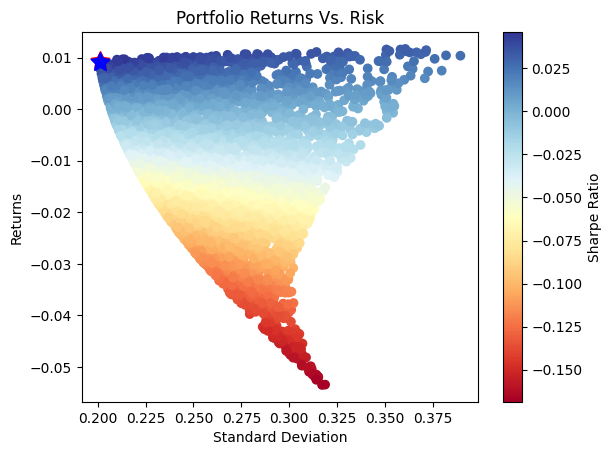

In [33]:
import matplotlib.pyplot as plt

# This is so I can see the plot inside of my Jupyter Notebook.
%matplotlib inline

# Plot the data on a Scatter plot.
plt.scatter(
    y=simulations_df['Returns'],
    x=simulations_df['Volatility'],
    c=simulations_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

# Give the Plot some labels, and titles.
plt.title('Portfolio Returns Vs. Risk')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')

# Plot the Max Sharpe Ratio, using a `Red Star`.
plt.scatter(
    max_sharpe_ratio_row['Volatility'],
    max_sharpe_ratio_row['Returns'],
    marker=(5, 1, 0),
    color='r',
    s=200
)

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_volatility_row['Volatility'],
    min_volatility_row['Returns'],
    marker=(5, 1, 0),
    color='b',
    s=200
)

# Finally, show the plot.
plt.show()


In [34]:
def get_metrics(weights: list) -> np.array:
    """
    ### Overview:
    ----
    With a given set of weights, return the portfolio returns,
    the portfolio volatility, and the portfolio Sharpe ratio.

    ### Arguments:
    ----
    weights (list): An array of portfolio weights.

    ### Returns:
    ----
    (np.array): An array containing return value, a volatility value,
        and a Sharpe ratio.
    """

    # Convert to a Numpy Array.
    weights = np.array(weights)

    # Calculate the returns, remember to annualize them (252).
    ret = np.sum(log_returns.mean() * weights) * 252

    # Calculate the volatility, remember to annualize them (252).
    vol = np.sqrt(
        np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio.
    sr = ret / vol

    return np.array([ret, vol, sr])

def grab_negative_sharpe(weights: list) -> np.array:
    """The function used to minimize the Sharpe Ratio.

    ### Arguments:
    ----
    weights (list): The weights, we are testing to see
        if it's the minimum.

    ### Returns:
    ----
    (np.array): A numpy array of the portfolio metrics.
    """
    return -get_metrics(weights)[2]

def grab_volatility(weights: list) -> np.array:
    """The function used to minimize the volatility.

    ### Arguments:
    ----
    weights (list): The weights, we are testing to see
        if it's the minimum.

    ### Returns:
    ----
    (np.array): A numpy array of the portfolio metrics.
    """
    return get_metrics(weights)[1]

def check_sum(weights: list) -> float:
    """Ensure the allocations of the "weights" sum to 1 (100%)

    ### Arguments:
    ----
    weights (list): The weights we want to check to see
        if they sum to 1.

    ### Returns:
    ----
    float: The difference between 1 and the sum of the weights.
    """
    return np.sum(weights) - 1


In [35]:
import scipy.optimize as sci_opt

# Define the boundaries for each stock. Remember you can only invest up to 100% of your capital into a single asset.
bounds = tuple((0, 1) for symbol in range(number_of_symbols))

# Define the constraints, here we're saying that the sum of each weight must not exceed 100%.
constraints = ({'type': 'eq', 'fun': check_sum})

# We need to create an initial guess to start with, and usually the best initial guess is just an even distribution.
# In this case, 25% for each of the stocks.
init_guess = [1 / number_of_symbols] * number_of_symbols

# Perform the operation to minimize the negative Sharpe ratio (i.e., maximize the Sharpe ratio).
optimized_sharpe = sci_opt.minimize(
    grab_negative_sharpe,  # Minimize this function.
    init_guess,  # Start with these initial values.
    method='SLSQP',
    bounds=bounds,  # Don't exceed these bounds.
    constraints=constraints  # Make sure you don't exceed the 100% constraint.
)

# Print the results.
print('')
print('='*80)
print('OPTIMIZED SHARPE RATIO:')
print('-'*80)
print(optimized_sharpe)
print('-'*80)



OPTIMIZED SHARPE RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.046720912765615824
       x: [ 1.968e-01  8.032e-01  0.000e+00]
     nit: 7
     jac: [ 5.626e-05 -1.379e-05  3.236e-01]
    nfev: 29
    njev: 7
--------------------------------------------------------------------------------


In [36]:
# Grab the metrics.
optimized_metrics = get_metrics(weights=optimized_sharpe.x)

# Print the Optimized Weights.
print('')
print('='*80)
print('OPTIMIZED WEIGHTS:')
print('-'*80)
print(optimized_sharpe.x)
print('-'*80)

# Print the Optimized Metrics.
print('')
print('='*80)
print('OPTIMIZED METRICS:')
print('-'*80)
print(optimized_metrics)
print('-'*80)



OPTIMIZED WEIGHTS:
--------------------------------------------------------------------------------
[0.19682538 0.80317462 0.        ]
--------------------------------------------------------------------------------

OPTIMIZED METRICS:
--------------------------------------------------------------------------------
[0.00954361 0.20426843 0.04672091]
--------------------------------------------------------------------------------


In [37]:
import scipy.optimize as sci_opt

# Define the boundaries for each stock. Remember you can only invest up to 100% of your capital into a single asset.
bounds = tuple((0, 1) for symbol in range(number_of_symbols))

# Define the constraints, here we're saying that the sum of each weight must not exceed 100%.
constraints = ({'type': 'eq', 'fun': check_sum})

# We need to create an initial guess to start with, and usually the best initial guess is just an even distribution.
# In this case, 25% for each of the stocks.
init_guess = [1 / number_of_symbols] * number_of_symbols

# Perform the operation to minimize volatility.
optimized_volatility = sci_opt.minimize(
    grab_volatility,  # Minimize this function.
    init_guess,  # Start with these initial values.
    method='SLSQP',
    bounds=bounds,  # Don't exceed these bounds.
    constraints=constraints  # Make sure you don't exceed the 100% constraint.
)

# Print the results.
print('')
print('='*80)
print('OPTIMIZED VOLATILITY RATIO:')
print('-'*80)
print(optimized_volatility)
print('-'*80)



OPTIMIZED VOLATILITY RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.20091273051171146
       x: [ 9.977e-02  9.002e-01  0.000e+00]
     nit: 6
     jac: [ 2.010e-01  2.009e-01  2.254e-01]
    nfev: 24
    njev: 6
--------------------------------------------------------------------------------


In [38]:
# Grab the metrics.
optimized_metrics = get_metrics(weights=optimized_volatility.x)

# Print the Optimized Weights.
print('')
print('='*80)
print('OPTIMIZED WEIGHTS:')
print('-'*80)
print(optimized_volatility.x)
print('-'*80)

# Print the Optimized Metrics.
print('')
print('='*80)
print('OPTIMIZED METRICS:')
print('-'*80)
print(optimized_metrics)
print('-'*80)



OPTIMIZED WEIGHTS:
--------------------------------------------------------------------------------
[0.09977463 0.90022537 0.        ]
--------------------------------------------------------------------------------

OPTIMIZED METRICS:
--------------------------------------------------------------------------------
[0.00923446 0.20091273 0.04596252]
--------------------------------------------------------------------------------
